Import Modules

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt



Load Data

In [4]:
filename = r'C:\Users\Kevin\Bench Projects\OnlineNewsPopularity\OnlineNewsPopularity.csv'
pd.set_option("display.max_columns", None)
news_df = pd.read_csv(filename)
display(news_df)


url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs   num_videos   average_token_length  \
0                  2.0        1.0          0.0               4.680365   
1                  1.0        1.0          0.0               4.913725   
2                  1.0        1.0          0.0               4.393365   
3                  0.0        1.0          0.0               4.404896   
4                 19.0       20.0          0.0               4.682836   
...                ...        ...          ...                    ...   
39639              7.0        1.0          1.0               4.523121   
39640              7.0        3.0         48.0               4.405488   
39641              1.0       12.0          1.0               5.076923   
39642              1.0        1.0          0.0               4.975073   
39643              1.0        0.0          2.0               4.471338   

        num_keywords   data_channel_is_lifestyle  \
0                5.0                         0.0   
1                4.0                         0.0   
2                6.0                         0.0   
3                7.0                         0.0   
4                7.0                         0.0   
...              ...                         ...   
39639            8.0                         0.0   
39640            7.0                         0.0   
39641            8.0                         0.0   
39642            5.0                         0.0   
39643            4.0                         0.0   

        data_channel_is_entertainment   data_channel_is_bus  \
0                                 1.0                   0.0  

### Perform EDA and Data Cleansing


In [5]:
news_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [6]:
news_df=news_df.rename(columns=lambda x: x.strip())
news_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [7]:
news_df.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    39644.000000  39644.000000  39644.000000          39644.000000   
mean         3.293638      4.544143      1.249874              4.548239   
std          3.855141      8.309434      4.107855              0.844406   
min          0.000000      0.000000      0.000000              0.000000   
25%          1.000000      1.000000      0.000000              4.478404   
50%          3.000000      1.000000      0.000000              4.664082   
75%          4.000000      4.000000      1.000000              4.854839   
max        116.000000    128.000000     91.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  39644.000000               39644.000000                   39644.000000   
mean       7.223767                   0.052946                       0.178009   
std        1.909130                   0.223929                       0.382525   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         39644.000000            39644.000000          39644.000000   
mean              0.157855                0.058597              0.185299   
std               0.364610                0.234871              0.388545   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min  \
count           39644.000000  39644.000000   39644.000000  39644.000000   
mean                0.212567     26.106801    1153.951682    312.366967   
std                 0.409129     69.633215    3857.990877    620.783887   
min                 0.000000     -1.000000       0.000000     -1.000000   
25%                 0.000000     -1.000000     445.000000    141.750000   
50%                 0.000000     -1.000000     660.000000    235.500000   
75%                 0.000000      4.000000    1000.000000    357.000000   
max                 1.000000    377.000000  2984

In [8]:
news_df['n_non_stop_words'].value_counts().sort_values()

1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
       ... 
1.0     129
1.0     133
1.0     136
1.0     138
0.0    1181
Name: n_non_stop_words, Length: 1451, dtype: int64

In [9]:

news_df['n_tokens_content'].value_counts().sort_index()

0.0       1181
18.0         1
21.0         1
22.0         1
24.0         1
          ... 
7081.0       1
7185.0       1
7413.0       1
7764.0       1
8474.0       1
Name: n_tokens_content, Length: 2406, dtype: int64

In [10]:
news_df.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    39644.000000  39644.000000  39644.000000          39644.000000   
mean         3.293638      4.544143      1.249874              4.548239   
std          3.855141      8.309434      4.107855              0.844406   
min          0.000000      0.000000      0.000000              0.000000   
25%          1.000000      1.000000      0.000000              4.478404   
50%          3.000000      1.000000      0.000000              4.664082   
75%          4.000000      4.000000      1.000000              4.854839   
max        116.000000    128.000000     91.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  39644.000000               39644.000000                   39644.000000   
mean       7.223767                   0.052946                       0.178009   
std        1.909130                   0.223929                       0.382525   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         39644.000000            39644.000000          39644.000000   
mean              0.157855                0.058597              0.185299   
std               0.364610                0.234871              0.388545   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min  \
count           39644.000000  39644.000000   39644.000000  39644.000000   
mean                0.212567     26.106801    1153.951682    312.366967   
std                 0.409129     69.633215    3857.990877    620.783887   
min                 0.000000     -1.000000       0.000000     -1.000000   
25%                 0.000000     -1.000000     445.000000    141.750000   
50%                 0.000000     -1.000000     660.000000    235.500000   
75%                 0.000000      4.000000    1000.000000    357.000000   
max                 1.000000    377.000000  2984

In [11]:
news_df=news_df.drop(columns=['kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'])

In [12]:
news_df.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    39644.000000  39644.000000  39644.000000          39644.000000   
mean         3.293638      4.544143      1.249874              4.548239   
std          3.855141      8.309434      4.107855              0.844406   
min          0.000000      0.000000      0.000000              0.000000   
25%          1.000000      1.000000      0.000000              4.478404   
50%          3.000000      1.000000      0.000000              4.664082   
75%          4.000000      4.000000      1.000000              4.854839   
max        116.000000    128.000000     91.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  39644.000000               39644.000000                   39644.000000   
mean       7.223767                   0.052946                       0.178009   
std        1.909130                   0.223929                       0.382525   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         39644.000000            39644.000000          39644.000000   
mean              0.157855                0.058597              0.185299   
std               0.364610                0.234871              0.388545   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
count           39644.000000       39644.000000        39644.000000   
mean                0.212567           0.168020            0.186409   
std                 0.409129           0.373889            0.389441   
min                 0.000000           0.000000            0.000000   
25%                 0.000000           0.000000            0.000000   
50%                 0.000000           0.000000            0.000000   
75%                 0.000000           0.000000            0.000000   
max                 1.000000           1.000000            1.000000   

       w

## Remove Outliers

In [13]:
def remove_outliers(df, column_name):
  return df[np.abs(df[column_name]-df[column_name].mean()) <= (3*df[column_name].std())]

news_df_no_outliers = remove_outliers(news_df, "n_tokens_content")


In [14]:
news_df_no_outliers.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  38951.000000    38951.000000      38951.000000     38951.000000   
mean     354.811532       10.395086        509.866679         0.551888   
std      214.582444        2.109512        369.822875         3.551774   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        244.000000         0.474809   
50%      339.000000       10.000000        402.000000         0.541436   
75%      545.000000       12.000000        694.000000         0.610000   
max      731.000000       23.000000       1959.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      38951.000000              38951.000000  38951.000000   
mean           0.996406                  0.692383     10.539960   
std            5.277563                  3.293624     10.557319   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.629560      4.000000   
50%            1.000000                  0.692308      7.000000   
75%            1.000000                  0.756098     13.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    38951.000000  38951.000000  38951.000000          38951.000000   
mean         3.202768      4.295602      1.215656              4.547569   
std          3.634857      7.676576      3.865965              0.851304   
min          0.000000      0.000000      0.000000              0.000000   
25%          1.000000      1.000000      0.000000              4.479373   
50%          2.000000      1.000000      0.000000              4.665663   
75%          4.000000      4.000000      1.000000              4.857143   
max        116.000000    100.000000     91.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  38951.000000               38951.000000                   38951.000000   
mean       7.218095                   0.052964                       0.176555   
std        1.908553                   0.223964                       0.381297   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         38951.000000            38951.000000          38951.000000   
mean              0.158481                0.056969              0.184334   
std               0.365196                0.231786              0.387761   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
count           38951.000000       38951.000000        38951.000000   
mean                0.213653           0.168186            0.186208   
std                 0.409890           0.374036            0.389280   
min                 0.000000           0.000000            0.000000   
25%                 0.000000           0.000000            0.000000   
50%                 0.000000           0.000000            0.000000   
75%                 0.000000           0.000000            0.000000   
max                 1.000000           1.000000            1.000000   

       w

In [15]:
column_list = ['n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens', 'num_hrefs','num_self_hrefs','num_imgs','num_videos','shares']
for column in column_list:
    news_df_no_outliers = remove_outliers(news_df_no_outliers, column)

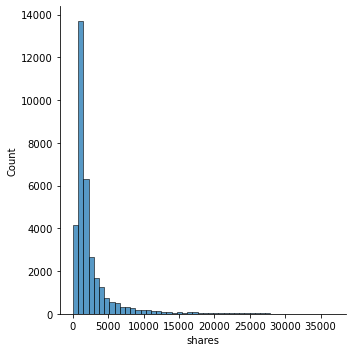

In [16]:
sns.displot(data=news_df_no_outliers, x='shares', kind='hist', bins=50)


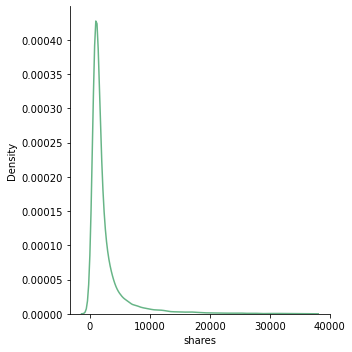

In [17]:
sns.displot(x = 'shares', data = news_df_no_outliers, kind = 'kde', color = '#67B587')


In [18]:
news_df_no_outliers.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  34323.000000    34323.000000      34323.000000     34323.000000   
mean     359.739533       10.372316        495.903563         0.555750   
std      213.847302        2.108040        337.324791         0.095934   
min        8.000000        3.000000         18.000000         0.268199   
25%      171.000000        9.000000        248.000000         0.487280   
50%      346.000000       10.000000        395.000000         0.550633   
75%      548.000000       12.000000        657.000000         0.616059   
max      731.000000       23.000000       1956.000000         0.972973   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      3.432300e+04              34323.000000  34323.000000   
mean       1.000000e+00                  0.704434      9.480611   
std        3.948011e-09                  0.090491      7.160211   
min        9.999999e-01                  0.404444      0.000000   
25%        1.000000e+00                  0.644645      4.000000   
50%        1.000000e+00                  0.701068      7.000000   
75%        1.000000e+00                  0.762376     12.000000   
max        1.000000e+00                  0.986486     42.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    34323.000000  34323.000000  34323.000000          34323.000000   
mean         2.880576      3.288174      0.669289              4.685904   
std          2.284086      4.851055      1.633580              0.279123   
min          0.000000      0.000000      0.000000              3.600000   
25%          1.000000      1.000000      0.000000              4.496476   
50%          2.000000      1.000000      0.000000              4.676647   
75%          4.000000      3.000000      1.000000              4.861762   
max         12.000000     23.000000     12.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  34323.000000               34323.000000                   34323.000000   
mean       7.187251                   0.056347                       0.164409   
std        1.916133                   0.230594                       0.370651   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         34323.000000            34323.000000          34323.000000   
mean              0.173732                0.058037              0.194097   
std               0.378884                0.233817              0.395510   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
count           34323.000000       34323.000000        34323.000000   
mean                0.227282           0.166710            0.186843   
std                 0.419082           0.372723            0.389791   
min                 0.000000           0.000000            0.000000   
25%                 0.000000           0.000000            0.000000   
50%                 0.000000           0.000000            0.000000   
75%                 0.000000           0.000000            0.000000   
max                 1.000000           1.000000            1.000000   

       w

In [19]:
quantile=np.quantile(news_df_no_outliers['shares'], q=.70)
print(quantile)


2200.0


In [20]:
display(news_df_no_outliers)
news_df_no_outliers.describe()

url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...      731.0   
5       http://mashable.com/2013/01/07/beewi-smart-toys/      731.0   
...                                                  ...        ...   
39638  http://mashable.com/2014/12/27/protests-contin...        8.0   
39639  http://mashable.com/2014/12/27/samsung-app-aut...        8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...        8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/        8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
5                10.0             370.0         0.559889               1.0   
...               ...               ...              ...               ...   
39638            11.0             223.0         0.653153               1.0   
39639            11.0             346.0         0.529052               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
5                      0.698198        2.0             2.0       0.0   
...                         ...        ...             ...       ...   
39638                  0.825758        5.0             3.0       1.0   
39639                  0.684783        9.0             7.0       1.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  num_keywords  \
0             0.0              4.680365           5.0   
1             0.0              4.913725           4.0   
2             0.0              4.393365           6.0   
3             0.0              4.404896           7.0   
5             0.0              4.359459           9.0   
...           ...                   ...           ...   
39638         0.0              4.923767           6.0   
39639         1.0              4.523121           8.0   
39641         1.0              5.076923           8.0   
39642         0.0              4.975073           5.0   
39643         2.0              4.471338           4.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
0                            0.0                            1.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            1.0   
5                            0.0                            0.0   
...                          ...                            ...   
39638                        0.0                            0.0   
39639                        0.0                            0.0   
39641                        0.0                            0.0   
39642                        0.0           

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  34323.000000    34323.000000      34323.000000     34323.000000   
mean     359.739533       10.372316        495.903563         0.555750   
std      213.847302        2.108040        337.324791         0.095934   
min        8.000000        3.000000         18.000000         0.268199   
25%      171.000000        9.000000        248.000000         0.487280   
50%      346.000000       10.000000        395.000000         0.550633   
75%      548.000000       12.000000        657.000000         0.616059   
max      731.000000       23.000000       1956.000000         0.972973   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      3.432300e+04              34323.000000  34323.000000   
mean       1.000000e+00                  0.704434      9.480611   
std        3.948011e-09                  0.090491      7.160211   
min        9.999999e-01                  0.404444      0.000000   
25%        1.000000e+00                  0.644645      4.000000   
50%        1.000000e+00                  0.701068      7.000000   
75%        1.000000e+00                  0.762376     12.000000   
max        1.000000e+00                  0.986486     42.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    34323.000000  34323.000000  34323.000000          34323.000000   
mean         2.880576      3.288174      0.669289              4.685904   
std          2.284086      4.851055      1.633580              0.279123   
min          0.000000      0.000000      0.000000              3.600000   
25%          1.000000      1.000000      0.000000              4.496476   
50%          2.000000      1.000000      0.000000              4.676647   
75%          4.000000      3.000000      1.000000              4.861762   
max         12.000000     23.000000     12.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  34323.000000               34323.000000                   34323.000000   
mean       7.187251                   0.056347                       0.164409   
std        1.916133                   0.230594                       0.370651   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         34323.000000            34323.000000          34323.000000   
mean              0.173732                0.058037              0.194097   
std               0.378884                0.233817              0.395510   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
count           34323.000000       34323.000000        34323.000000   
mean                0.227282           0.166710            0.186843   
std                 0.419082           0.372723            0.389791   
min                 0.000000           0.000000            0.000000   
25%                 0.000000           0.000000            0.000000   
50%                 0.000000           0.000000            0.000000   
75%                 0.000000           0.000000            0.000000   
max                 1.000000           1.000000            1.000000   

       w

In [21]:
def bin_pol(row):
    if row['global_sentiment_polarity']<=.33 and row['global_sentiment_polarity']>0:
        return 'low_pos_pol'
    elif row['global_sentiment_polarity']<=.66 and row['global_sentiment_polarity']>.33:
        return 'med_pos_pol'
    elif row['global_sentiment_polarity']<=1 and row['global_sentiment_polarity']>.66:
        return 'high_pos_pol'
    elif row['global_sentiment_polarity']>-.33 and row['global_sentiment_polarity']<=0:
        return 'low_neg_pol'
    elif row['global_sentiment_polarity']>-.66 and row['global_sentiment_polarity']<=-.33:
        return 'med_neg_pol'
    elif row['global_sentiment_polarity']>-1 and row['global_sentiment_polarity']<=-.66:
        return 'high_neg_pol'
    else:
        return 'NULL'

news_df_no_outliers['polarity'] = news_df_no_outliers.apply(bin_pol, axis=1)
news_df_no_outliers['polarity'].value_counts()
news_df_no_outliers=pd.get_dummies(news_df_no_outliers, columns=['polarity'])

In [22]:
news_df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34323 entries, 0 to 39643
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            34323 non-null  object 
 1   timedelta                      34323 non-null  float64
 2   n_tokens_title                 34323 non-null  float64
 3   n_tokens_content               34323 non-null  float64
 4   n_unique_tokens                34323 non-null  float64
 5   n_non_stop_words               34323 non-null  float64
 6   n_non_stop_unique_tokens       34323 non-null  float64
 7   num_hrefs                      34323 non-null  float64
 8   num_self_hrefs                 34323 non-null  float64
 9   num_imgs                       34323 non-null  float64
 10  num_videos                     34323 non-null  float64
 11  average_token_length           34323 non-null  float64
 12  num_keywords                   34323 non-null 

In [23]:
def hit(row):
    if row['shares']>quantile:
        return 1
    else:
        return 0

news_df_no_outliers['hit'] = news_df_no_outliers.apply(hit, axis=1)

In [24]:
def weekday(row):
    if row['weekday_is_monday']==1 or row['weekday_is_tuesday']==1 or row['weekday_is_wednesday']==1 or row['weekday_is_thursday']==1 or row['weekday_is_friday']==1:
        return 1
    else:
        return 0

news_df_no_outliers['is_weekday'] = news_df_no_outliers.apply(weekday, axis=1)

<AxesSubplot:>

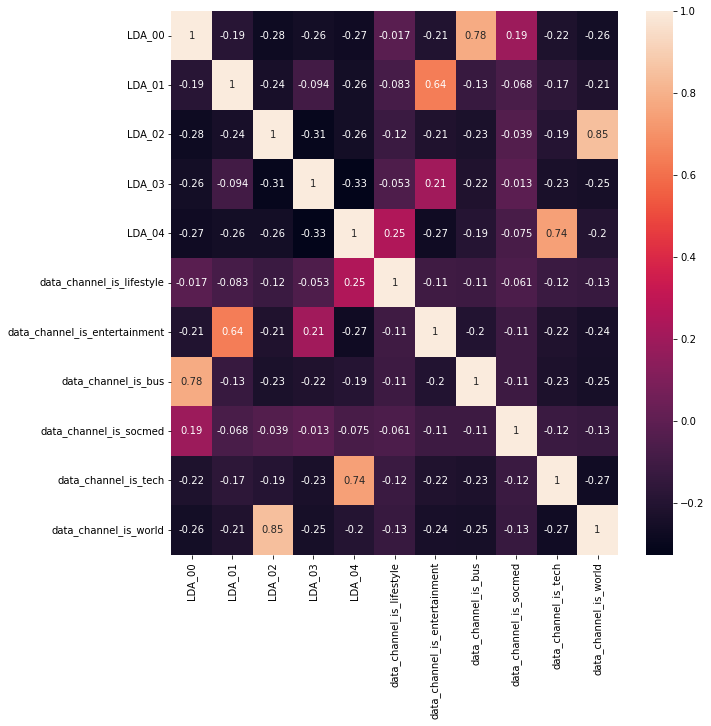

In [25]:
fig, axes = plt.subplots(figsize=(10,10))
a=news_df_no_outliers[['LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04','data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']].corr()
sns.heatmap(a, annot=True, ax=axes)

KeyboardInterrupt: 

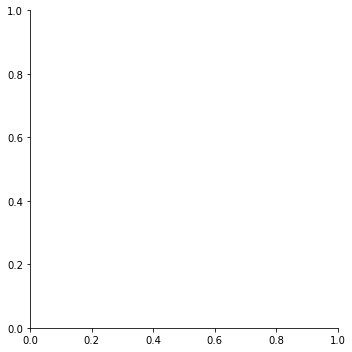

In [26]:
sns.displot(data=news_df_no_outliers, x='shares', kind='hist', bins=50)

In [ ]:
news_df_no_outliers.drop('url', axis=1, inplace=True)
news_df_no_outliers.drop('shares', axis=1, inplace=True)


In [ ]:
news_df_no_outliers['abs_global_pol_and_sub'] = abs(news_df_no_outliers['global_subjectivity']) * abs(news_df_no_outliers['global_sentiment_polarity'])
news_df_no_outliers['title_pol_and_sub'] = news_df_no_outliers['abs_title_subjectivity'] * news_df_no_outliers['abs_title_sentiment_polarity']

In [ ]:
def min_max_normalize(df, target_column):
    normalized_df = df.copy()
    for column in df.columns:
        if column != target_column:
            min_value = df[column].min()
            max_value = df[column].max()
            normalized_df[column] = (df[column] - min_value) / (max_value - min_value)
    return normalized_df

normalized_news_df = min_max_normalize(news_df_no_outliers, 'hit')




In [ ]:
corr=news_df_no_outliers.corr()
news_df_no_outliers.corr()

timedelta  n_tokens_title  n_tokens_content  \
timedelta                       1.000000       -0.234571         -0.129509   
n_tokens_title                 -0.234571        1.000000          0.019101   
n_tokens_content               -0.129509        0.019101          1.000000   
n_unique_tokens                 0.145382       -0.024365         -0.805754   
n_non_stop_words               -0.142043        0.037103          0.693303   
n_non_stop_unique_tokens        0.115100       -0.009638         -0.613839   
num_hrefs                      -0.029633       -0.055966          0.383096   
num_self_hrefs                  0.014495        0.020677          0.128946   
num_imgs                       -0.054787       -0.025934          0.194426   
num_videos                     -0.026098        0.045985          0.027768   
average_token_length           -0.046714       -0.092275         -0.053796   
num_keywords                    0.046996        0.001350          0.095587   
data_channel_is_lifestyle       0.058962       -0.071989          0.050812   
data_channel_is_entertainment  -0.035348        0.120631          0.004917   
data_channel_is_bus             0.050483       -0.020250          0.008402   
data_channel_is_socmed          0.062785       -0.083977          0.000405   
data_channel_is_tech            0.071179       -0.040759         -0.014949   
data_channel_is_world          -0.183996        0.055590          0.135656   
weekday_is_monday              -0.009015        0.003990         -0.010936   
weekday_is_tuesday             -0.002817        0.003735         -0.010166   
weekday_is_wednesday            0.013273        0.009159         -0.004053   
weekday_is_thursday             0.008223       -0.018382         -0.011544   
weekday_is_friday              -0.001887       -0.001561         -0.009146   
weekday_is_saturday            -0.014169       -0.010417          0.040101   
weekday_is_sunday               0.000291        0.014439          0.031476   
is_weekend                     -0.009862        0.003450          0.052205   
LDA_00                          0.070592       -0.064256          0.041798   
LDA_01                         -0.002701        0.067866         -0.033686   
LDA_02                         -0.155538        0.046459          0.137234   
LDA_03                          0.009107        0.023019         -0.179803   
LDA_04                          0.080932       -0.058828          0.019912   
global_subjectivity             0.039901       -0.035686         -0.018039   
global_sentiment_polarity       0.135812       -0.057861         -0.040459   
global_rate_positive_words      0.158048       -0.050200          0.039623   
global_rate_negative_words     -0.048875        0.019225          0.074324   
rate_positive_words             0.138179       -0.043499         -0.048793   
rate_negative_words            -0.138340        0.044691          0.049780   
avg_positive_polarity           0.045241       -0.030293         -0.008350   
min_positive_polarity           0.021225       -0.013041         -0.350653   
max_positive_polarity           0.011852        0.001157          0.372596   
avg_negative_polarity           0.058123       -0.031124         -0.060142   
min_negative_polarity           0.124619       -0.039281         -0.423897   
max_negative_polarity          -0.039177        0.001231          0.291884   
title_subjectivity             -0.014903        0.081434         -0.003129   
title_sentiment_polarity        0.039409        0.005269          0.012665   
abs_title_subjectivity          0.014723       -0.150788          0.011995   
abs_title_sentiment_polarity   -0.002306        0.048109          0.014470   
polarity_high_pos_pol           0.009295       -0.008635         -0.005631   
polarity_low_neg_pol           -0.081304        0.029970         -0.093182   
polarity_low_pos_pol            0.054050       -0.014819          0.131081   
polarity_med_neg_pol            0.003847       -0.013

<AxesSubplot:>

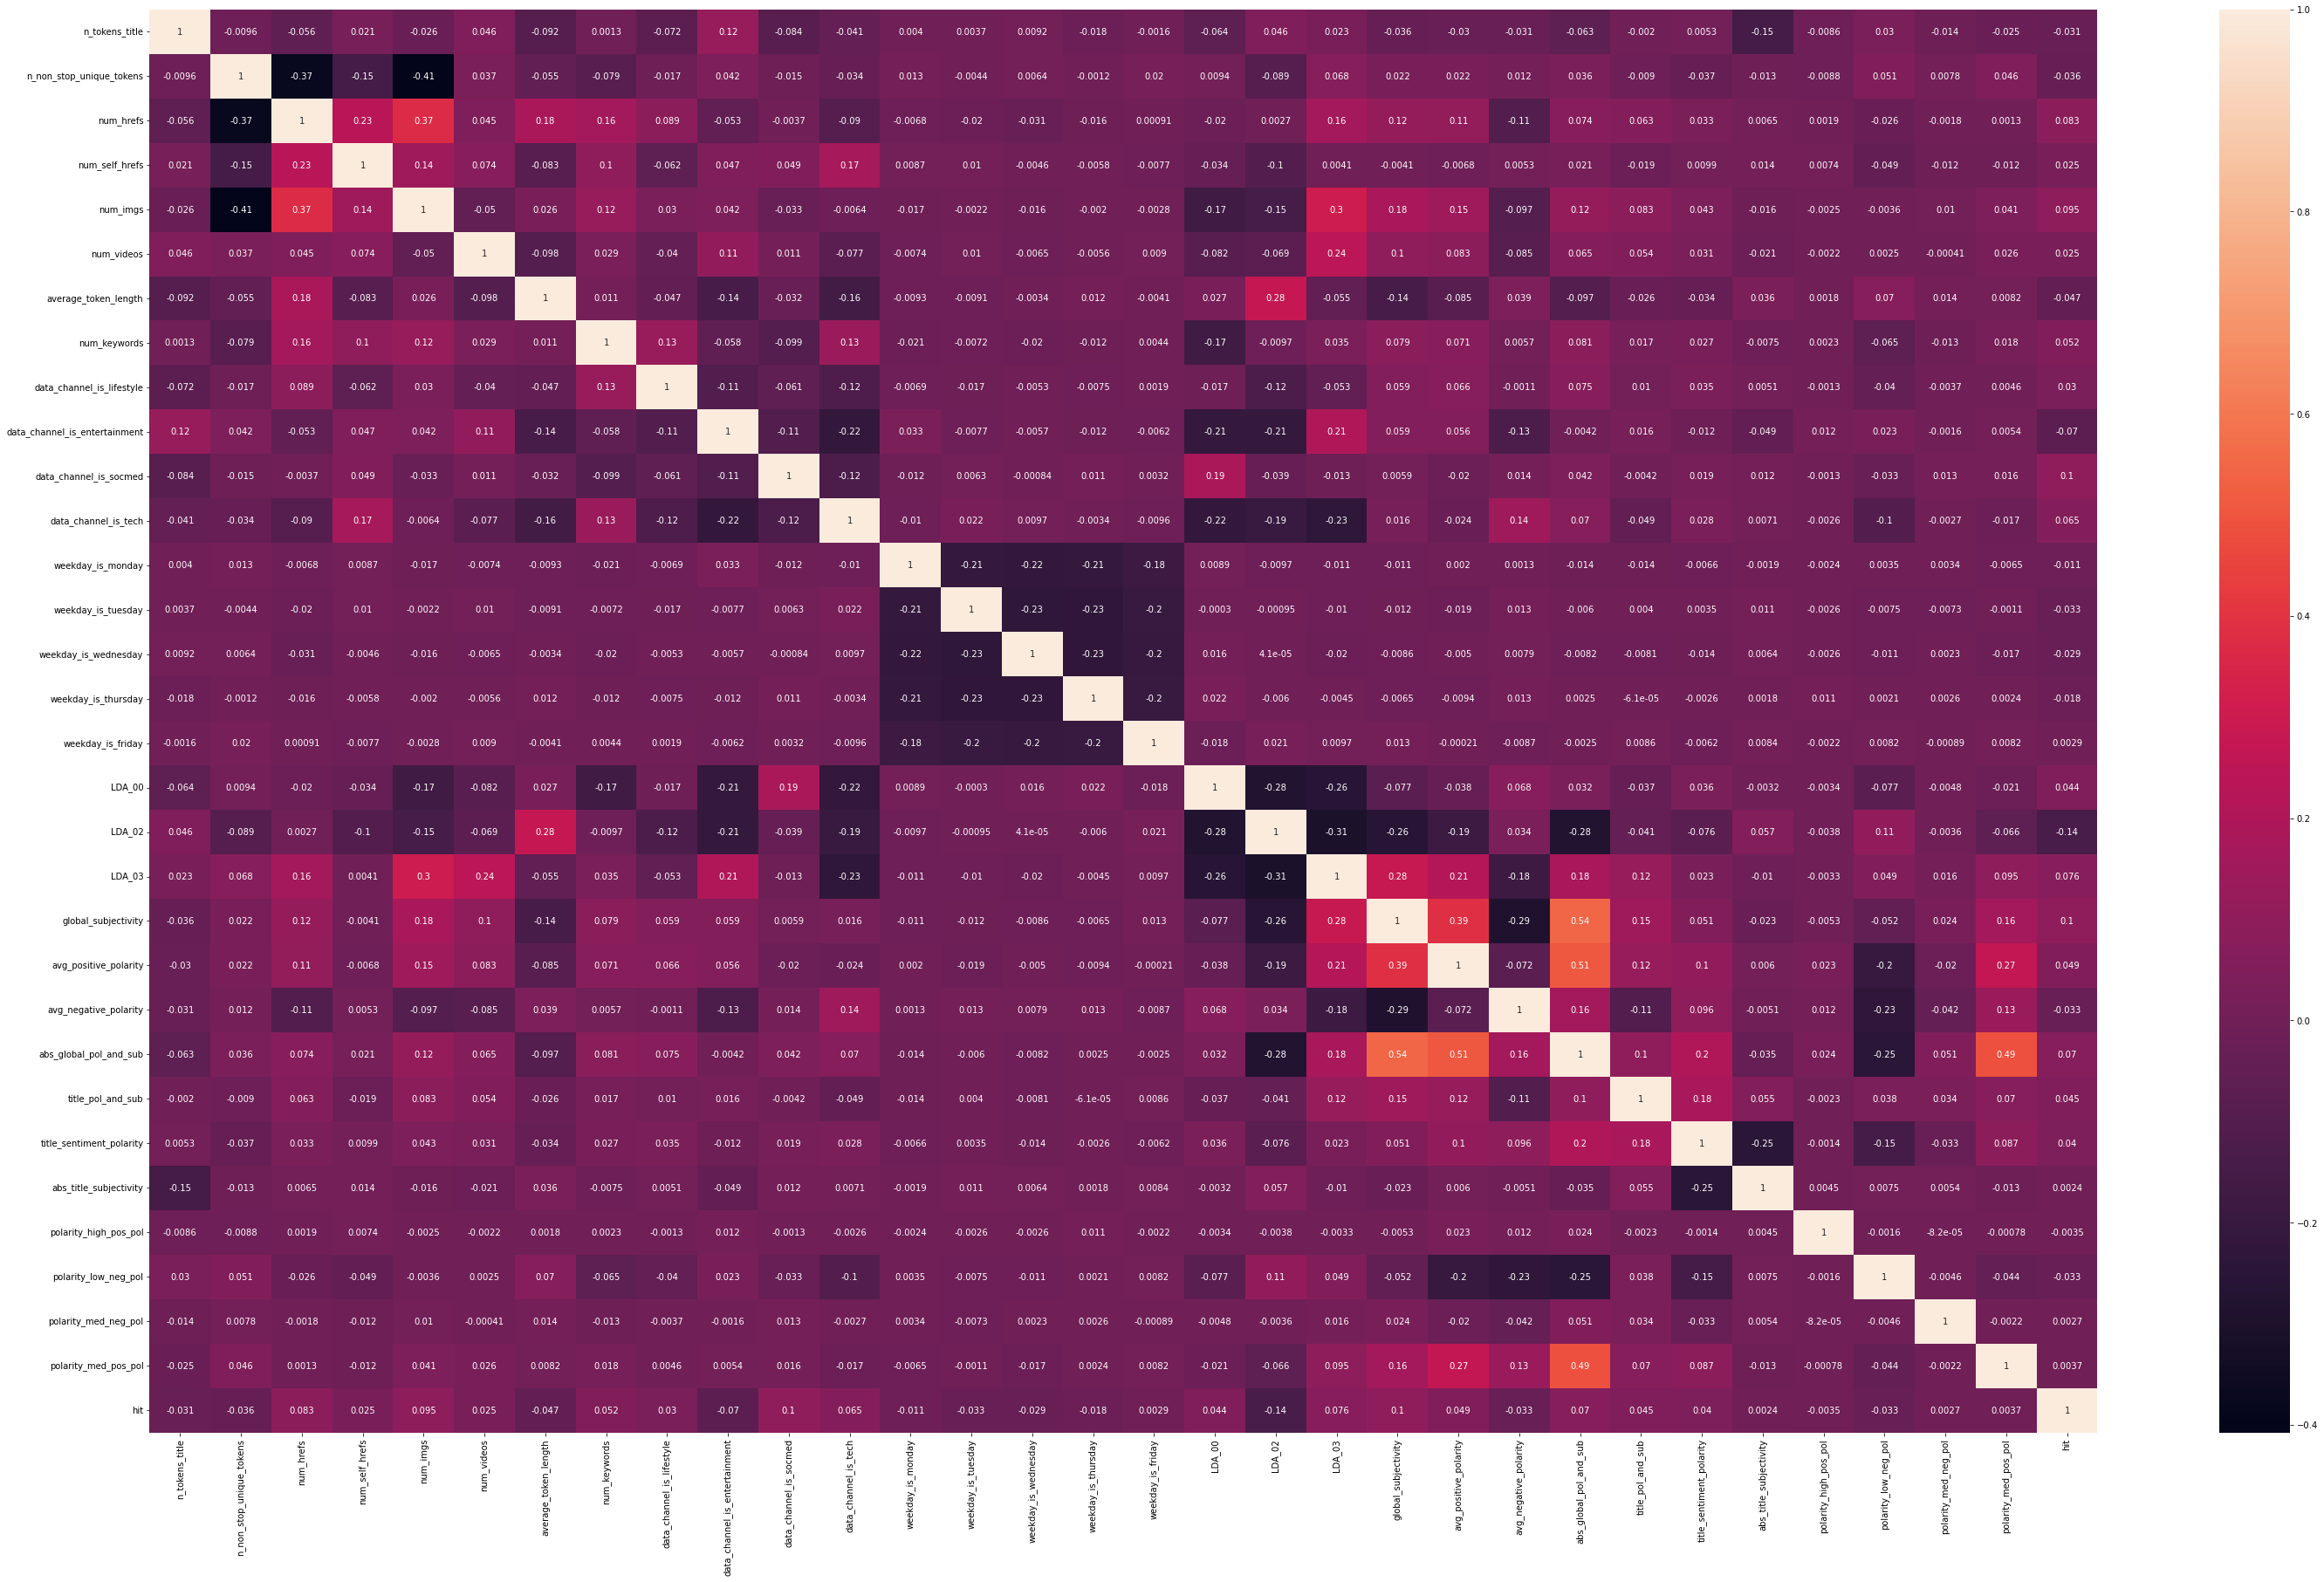

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(50,30))
sns.heatmap(news_df_no_outliers[['n_tokens_title', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 
       'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'LDA_00',
       'LDA_02', 'LDA_03', 'global_subjectivity', 'avg_positive_polarity', 'avg_negative_polarity',
       'abs_global_pol_and_sub', 'title_pol_and_sub',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'polarity_high_pos_pol',
       'polarity_low_neg_pol', 'polarity_med_neg_pol',
       'polarity_med_pos_pol', 'hit']].corr(), annot=True, ax=axs)

In [ ]:
news_df_no_outliers.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_pola

In [ ]:
X=news_df_no_outliers[['n_tokens_title', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 
       'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'LDA_00',
       'LDA_02', 'LDA_03', 'global_subjectivity', 'avg_positive_polarity', 'avg_negative_polarity',
       'abs_global_pol_and_sub', 'title_pol_and_sub',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'polarity_high_pos_pol',
       'polarity_low_neg_pol', 'polarity_med_neg_pol',
       'polarity_med_pos_pol']]
y=news_df_no_outliers['hit']


### Feature Elimination with SelectFromModel using LGBM Classfier 

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor

lgbc=LGBMClassifier(n_estimators=1000, learning_rate=0.01, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

import xgboost as xgb

xgbc = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=32, colsample_bytree=0.2,
                        reg_alpha=3, reg_lambda=1, min_split_loss=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc,max_features=20)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

13 selected features
['n_non_stop_unique_tokens', 'num_self_hrefs', 'average_token_length', 'LDA_00', 'LDA_02', 'LDA_03', 'global_subjectivity', 'avg_positive_polarity', 'avg_negative_polarity', 'abs_global_pol_and_sub', 'title_pol_and_sub', 'title_sentiment_polarity', 'abs_title_subjectivity']


<AxesSubplot:>

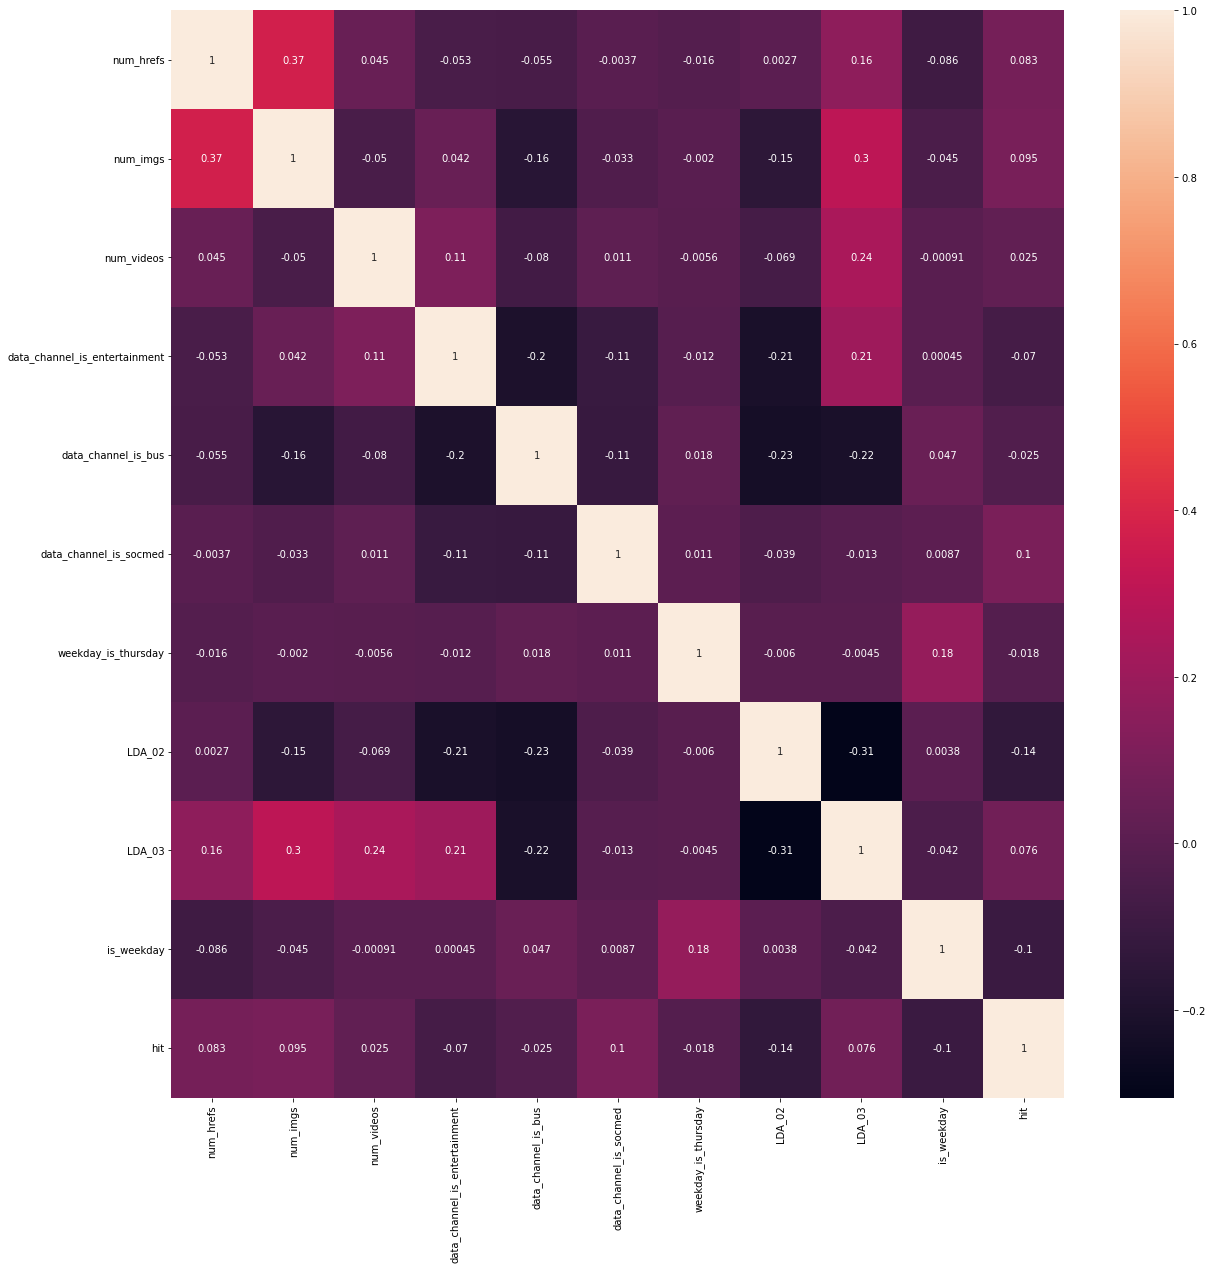

In [ ]:
fig, axes = plt.subplots(figsize=(20,20))
sns.heatmap(news_df_no_outliers[['num_hrefs', 'num_imgs', 'num_videos', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'weekday_is_thursday', 'LDA_02', 'LDA_03', 'is_weekday','hit']].corr(), annot=True, ax=axes)

<AxesSubplot:>

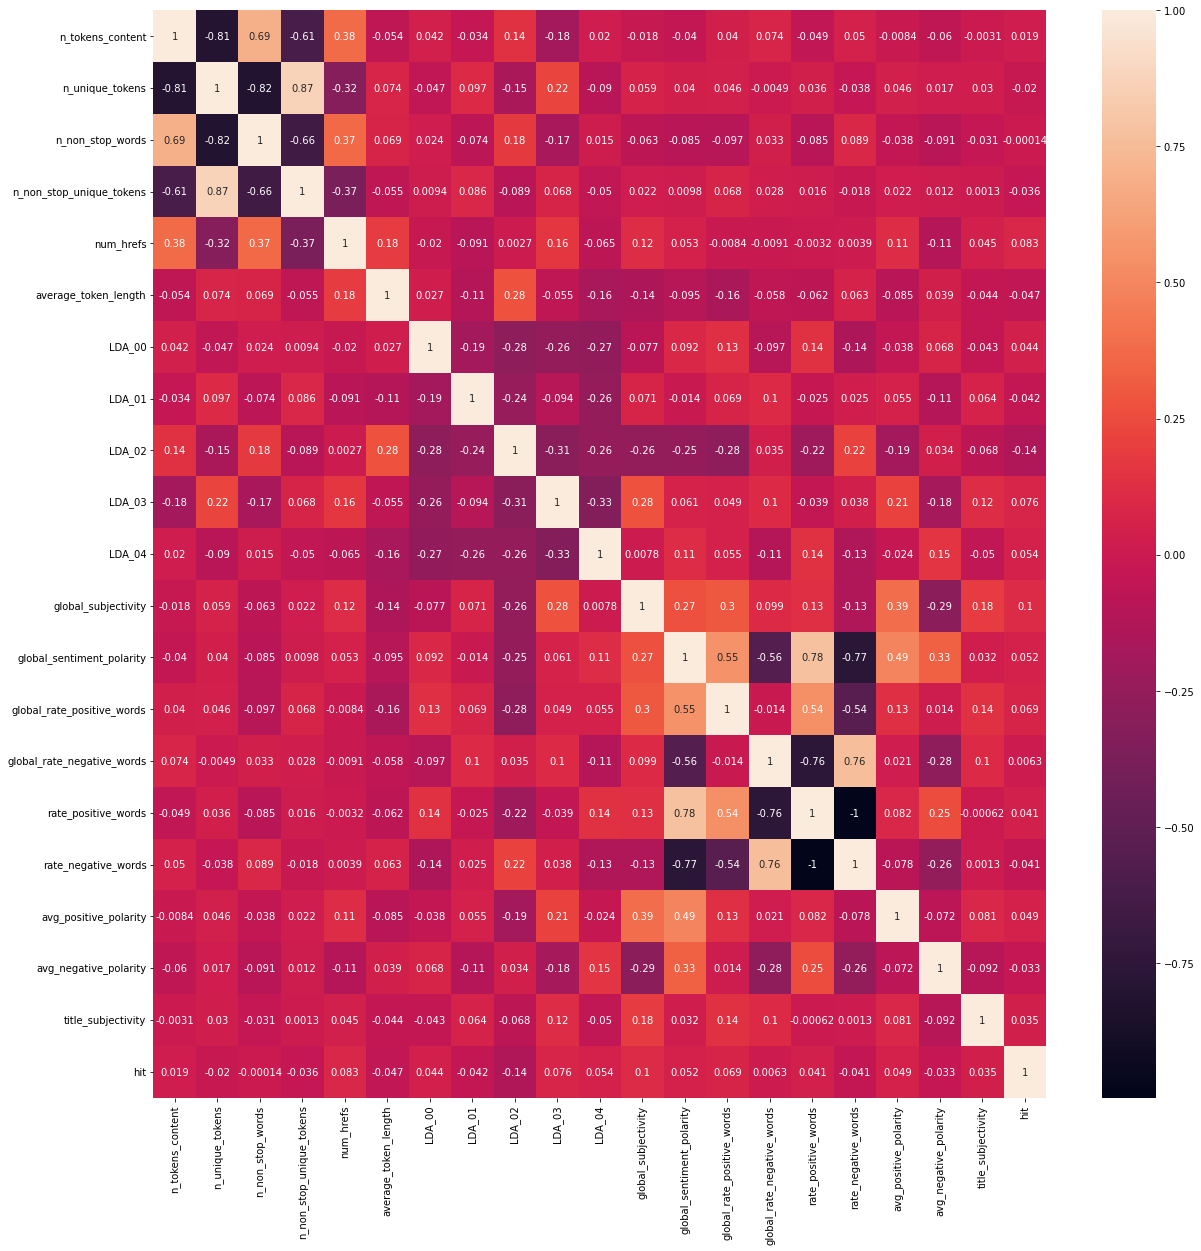

In [ ]:
fig, axes = plt.subplots(figsize=(20,20))
sns.heatmap(news_df_no_outliers[['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'average_token_length', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity', 'title_subjectivity','hit']].corr(), annot=True, ax=axes)

### Feature Elimination with Recursive Feature Elimination using Logistic Regression Algorithm

In [ ]:
X_norm=normalized_news_df[['n_tokens_title', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 
       'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'LDA_00',
       'LDA_02', 'LDA_03', 'global_subjectivity', 'avg_positive_polarity', 'avg_negative_polarity',
       'abs_global_pol_and_sub', 'title_pol_and_sub',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'polarity_high_pos_pol',
       'polarity_low_neg_pol', 'polarity_med_neg_pol',
       'polarity_med_pos_pol']]

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=1000), n_features_to_select=10, step=1000, verbose=5)
# rfe_selector.fit(X_norm, y)
# rfe_support = rfe_selector.get_support()
# rfe_feature = X.loc[:,rfe_support].columns.tolist()
# print(str(len(rfe_feature)), 'selected features')
# print(rfe_feature)


n_tokens_title  n_non_stop_words  num_hrefs  \
n_tokens_title                       1.000000          0.037103  -0.055966   
n_non_stop_words                     0.037103          1.000000   0.371519   
num_hrefs                           -0.055966          0.371519   1.000000   
num_self_hrefs                       0.020677          0.125031   0.234392   
num_imgs                            -0.025934          0.211717   0.369705   
num_videos                           0.045985          0.011326   0.045416   
average_token_length                -0.092275          0.069265   0.183652   
data_channel_is_lifestyle           -0.071989          0.052552   0.089334   
data_channel_is_entertainment        0.120631          0.013140  -0.053378   
data_channel_is_bus                 -0.020250          0.002891  -0.055427   
LDA_02                               0.046459          0.179217   0.002725   
global_subjectivity                 -0.035686         -0.062611   0.116897   
global_sentiment_polarity           -0.057861         -0.085433   0.052684   
min_positive_polarity               -0.013041         -0.404535  -0.134009   
title_sentiment_polarity             0.005269          0.005567   0.032748   
polarity_med_neg_pol                -0.013562         -0.042645  -0.001825   

                               num_self_hrefs  num_imgs  num_videos  \
n_tokens_title                       0.020677 -0.025934    0.045985   
n_non_stop_words                     0.125031  0.211717    0.011326   
num_hrefs                            0.234392  0.369705    0.045416   
num_self_hrefs                       1.000000  0.143300    0.074279   
num_imgs                             0.143300  1.000000   -0.050281   
num_videos                           0.074279 -0.050281    1.000000   
average_token_length                -0.082670  0.025578   -0.098303   
data_channel_is_lifestyle           -0.061681  0.030361   -0.040329   
data_channel_is_entertainment        0.046664  0.042371    0.107990   
data_channel_is_bus                 -0.051776 -0.164629   -0.080071   
LDA_02                              -0.104777 -0.147927   -0.069327   
global_subjectivity                 -0.004084  0.175794    0.101865   
global_sentiment_polarity            0.047441  0.060465    0.032068   
min_positive_polarity               -0.080896  0.006149    0.015072   
title_sentiment_polarity             0.009862  0.043154    0.031452   
polarity_med_neg_pol                -0.011736  0.010109   -0.000414   

                               average_token_length  \
n_tokens_title                            -0.092275   
n_non_stop_words                           0.069265   
num_hrefs                                  0.183652   
num_self_hrefs                            -0.082670   
num_imgs                                   0.025578   
num_videos                                -0.098303   
average_token_length                       1.000000   
data_channel_is_lifestyle                 -0.047256   
data_channel_is_entertainment             -0.142467   
data_channel_is_bus                        0.034226   
LDA_02                                     0.276851   
global_subjectivity                       -0.141264   
global_sentiment_polarity                 -0.094623   
min_positive_polarity                     -0.019436   
title_sentiment_polarity                  -0.033930   
polarity_med_neg_pol                       0.013598   

                               data_channel_is_lifestyle  \
n_tokens_title                                 -0.071989   
n_non_stop_words                                0.052552   
num_hrefs                                       0.089334   
num_self_hrefs                                 -0.061681   
num_imgs                                        0.030361   
num_videos                                     -0.040329   
average_token_length                           -0.047256   
data_channel_is_lifestyle                       1.000000   
data_channel_is_ente

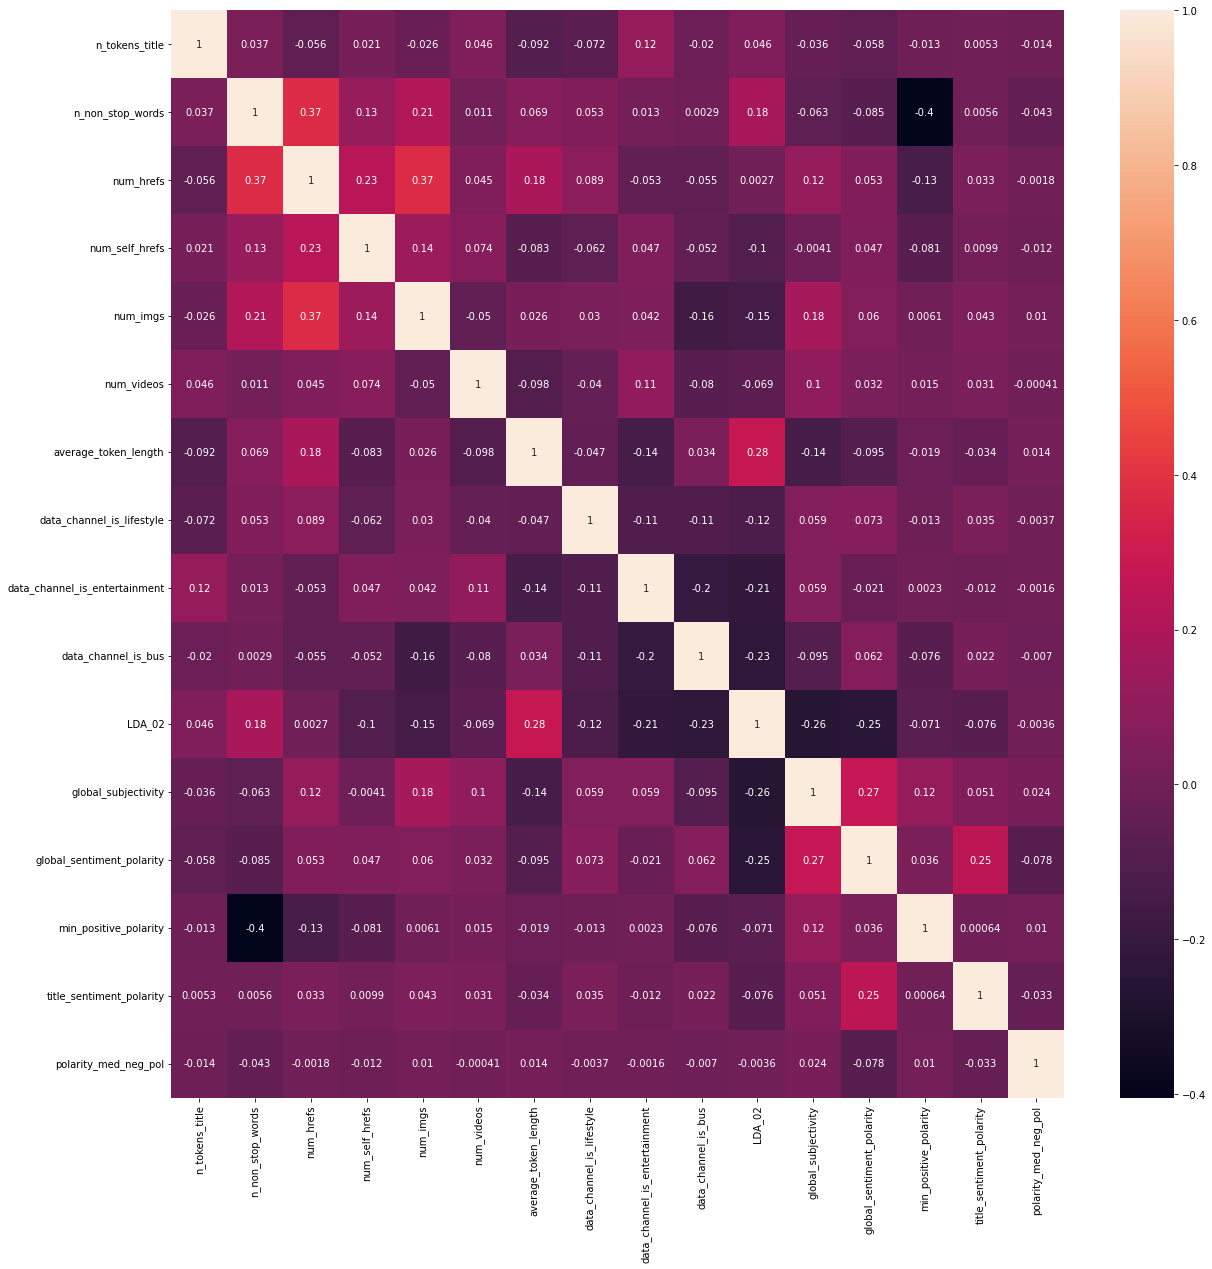

In [ ]:
feature_list=['n_tokens_title', 'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'LDA_02', 'global_subjectivity', 'global_sentiment_polarity', 'min_positive_polarity', 'title_sentiment_polarity', 'polarity_med_neg_pol']
fig, axes = plt.subplots(figsize=(20,20))
sns.heatmap(news_df_no_outliers[feature_list].corr(), annot=True, ax=axes)
news_df_no_outliers[feature_list].corr()


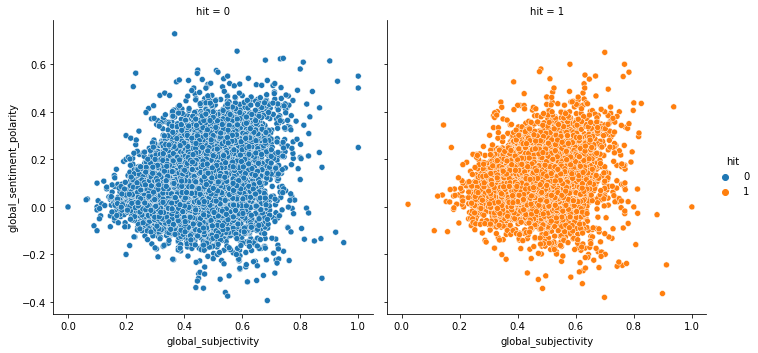

In [ ]:
sns.relplot(data=news_df_no_outliers, x='global_subjectivity', y='global_sentiment_polarity', kind='scatter', hue='hit', col='hit')

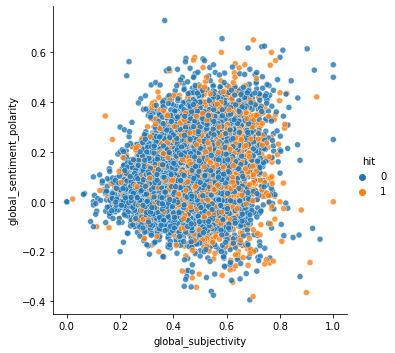

In [ ]:
sns.relplot(data=news_df_no_outliers, x='global_subjectivity', y='global_sentiment_polarity', kind='scatter', hue='hit', alpha=.8)



In [ ]:
news_df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34323 entries, 0 to 39643
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      34323 non-null  float64
 1   n_tokens_title                 34323 non-null  float64
 2   n_tokens_content               34323 non-null  float64
 3   n_unique_tokens                34323 non-null  float64
 4   n_non_stop_words               34323 non-null  float64
 5   n_non_stop_unique_tokens       34323 non-null  float64
 6   num_hrefs                      34323 non-null  float64
 7   num_self_hrefs                 34323 non-null  float64
 8   num_imgs                       34323 non-null  float64
 9   num_videos                     34323 non-null  float64
 10  average_token_length           34323 non-null  float64
 11  num_keywords                   34323 non-null  float64
 12  data_channel_is_lifestyle      34323 non-null 

	n_unique_tokens				num_self_hrefs	num_imgs	num_videos

In [ ]:
# from pandas.plotting import scatter_matrix
# features = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
#        'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
#        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
#        'num_keywords', 'data_channel_is_lifestyle',
#        'data_channel_is_entertainment', 'data_channel_is_bus',
#        'data_channel_is_socmed', 'data_channel_is_tech',
#        'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
#        'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
#        'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
#        'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
#        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
#        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
#        'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
#        'global_sentiment_polarity', 'global_rate_positive_words',
#        'global_rate_negative_words', 'rate_positive_words',
#        'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
#        'max_positive_polarity', 'avg_negative_polarity',
#        'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
#        'title_sentiment_polarity', 'abs_title_subjectivity',
#        'abs_title_sentiment_polarity', 'shares','hit']
# scatter_matrix(news_df_no_outliers[features].sample(1000) ,figsize = (13,13), c = '#66CD00', hist_kwds={'color':['#808A87']})
# plt.show()


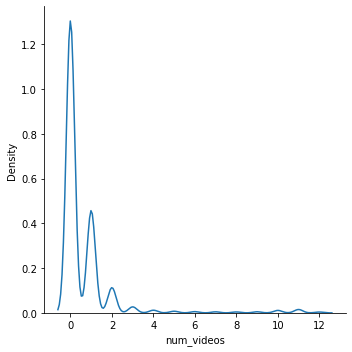

In [ ]:
sns.displot(data=news_df_no_outliers, x='num_videos', kind='kde', )

### Choosing Machine Learning Model
It's a logistic problem trying to figure out if the article is a hit or not. Three models we'll be using are:
1. Logistic Regression
2. Random Forest Classifer/XGBoost
3. Neural Networks 

### Logistic Regression

In [ ]:
def balance_df(df, col_name, col_val, random_seed=400):        # random_seed initialises a pseudo-random number generator
    mask = df[col_name]==col_val
    df1 = df[mask]
    df2 = df[~mask]                                            # ~ is called 'tilde' and it's the complement operator 
    
    n_df1 = df1.shape[0]                                       # recall -- .shape returns the dimensions of a df as a tuple
    n_df2 = df2.shape[0]                                       # .shape[0] returns the number of rows in a dataframe
    
    if n_df1 > n_df2:
        df1 = df1.sample(n_df2, random_state=random_seed)      # df.sample() returns a random sample of items from an object
    else:
        df2 = df2.sample(n_df1, random_state=random_seed)

    out_df = pd.concat([df1, df2])                             # recall -- .concat() vertically stacks two dataframes together
    return out_df 

balanced_norm_news_df=balance_df(normalized_news_df,'hit',1)
balanced_norm_news_df['hit'].value_counts()

1    10135
0    10135
Name: hit, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

normalized_news_train, normalized_news_test = train_test_split(normalized_news_df, test_size=0.3, random_state=0)          #splits data to 7:3 ratio
normalized_news_test, normalized_news_validation = train_test_split(normalized_news_test, test_size=0.5, random_state=0)     #splits the 3 of 7:3 into 1.5:1.5

# features=['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
#        'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
#        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
#        'num_keywords', 'data_channel_is_lifestyle',
#        'data_channel_is_entertainment', 'data_channel_is_bus',
#        'data_channel_is_socmed', 'data_channel_is_tech',
#        'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
#        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
#        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
#        'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
#        'global_sentiment_polarity', 'global_rate_positive_words',
#        'global_rate_negative_words', 'rate_positive_words',
#        'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
#        'max_positive_polarity', 'avg_negative_polarity',
#        'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
#        'title_sentiment_polarity', 'abs_title_subjectivity',
#        'abs_title_sentiment_polarity', 'polarity_high_pos_pol',
#        'polarity_low_neg_pol', 'polarity_low_pos_pol', 'polarity_med_neg_pol',
#        'polarity_med_pos_pol', 'is_weekday']

features= ['n_tokens_title', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 
       'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'LDA_00',
       'LDA_02', 'LDA_03', 'global_subjectivity', 'avg_positive_polarity', 'avg_negative_polarity',
       'abs_global_pol_and_sub', 'title_pol_and_sub',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'polarity_high_pos_pol',
       'polarity_low_neg_pol', 'polarity_med_neg_pol',
       'polarity_med_pos_pol']

normalized_news_train = balance_df(normalized_news_train, 'hit',1)

X_train = normalized_news_train[features]
y_train = normalized_news_train['hit']


X_validation = normalized_news_validation[features]
y_validation = normalized_news_validation['hit']

X_test = normalized_news_test[features]
y_test = normalized_news_test['hit']

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)                              #train the model
y_pred = logreg.predict(X_validation)                     #predicting using the validation set
y_pred_proba = logreg.predict_proba(X_validation)[:,1]

# Change the decision threshold
new_threshold = 0.50
y_pred_new = (y_pred_proba >= new_threshold).astype(int)

logreg.coef_: [[-0.01973856  0.20072022  0.60147574 -0.20596825  0.68512161  0.37077117
  -0.65234752  0.23994971  0.11389256 -0.40399576  0.89822958  0.44792902
  -0.58292261 -0.71655711 -0.64759759 -0.69154506 -0.47796162  0.27416748
  -0.70471031  0.28036723  1.59915493 -0.30978043 -0.13363777 -0.71217126
   0.33746541  0.33997717  0.05846433 -0.15686385 -0.18649945  0.27025045
  -0.2124449 ]]
logreg.intercept_: [-0.50505739]
Accuracy score is 0.6049718391920761
Precision is 0.38927038626609445
Recall is 0.5974967061923584
F1 score is 0.47141372141372145
ROC AUC is 0.602796824591635
[[2208 1423]
 [ 611  907]]


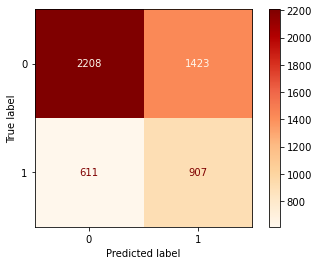

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print(f"logreg.coef_: {logreg.coef_}")
print(f"logreg.intercept_: {logreg.intercept_}")

acc_score = accuracy_score(y_validation, y_pred)
print(f'Accuracy score is {acc_score}')

pr = precision_score(y_validation, y_pred)                        #how accurate the prediction was out of the predicted values
print(f'Precision is {pr}')

re = recall_score(y_validation, y_pred)                           #how much did the prediction encapsulate 
print(f'Recall is {re}')

f1 = f1_score(y_validation, y_pred)                               #more balanced accuracy score
print(f'F1 score is {f1}')

roc_auc = roc_auc_score(y_validation, y_pred)                     #how good the model is 
print(f'ROC AUC is {roc_auc}')

cm = confusion_matrix(y_validation, y_pred)
print(cm)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")

In [ ]:
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68      3631
           1       0.39      0.60      0.47      1518

    accuracy                           0.60      5149
   macro avg       0.59      0.60      0.58      5149
weighted avg       0.67      0.60      0.62      5149



logreg.coef_: [[-0.01973856  0.20072022  0.60147574 -0.20596825  0.68512161  0.37077117
  -0.65234752  0.23994971  0.11389256 -0.40399576  0.89822958  0.44792902
  -0.58292261 -0.71655711 -0.64759759 -0.69154506 -0.47796162  0.27416748
  -0.70471031  0.28036723  1.59915493 -0.30978043 -0.13363777 -0.71217126
   0.33746541  0.33997717  0.05846433 -0.15686385 -0.18649945  0.27025045
  -0.2124449 ]]
logreg.intercept_: [-0.50505739]
Accuracy score is 0.6049718391920761
Precision is 0.38927038626609445
Recall is 0.5974967061923584
F1 score is 0.47141372141372145
ROC AUC is 0.602796824591635
[[2208 1423]
 [ 611  907]]


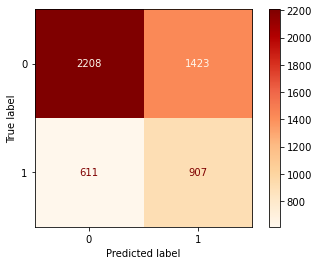

In [ ]:
print(f"logreg.coef_: {logreg.coef_}")
print(f"logreg.intercept_: {logreg.intercept_}")

acc_score = accuracy_score(y_validation, y_pred_new)
print(f'Accuracy score is {acc_score}')

pr = precision_score(y_validation, y_pred_new)                        #how accurate the prediction was out of the predicted values
print(f'Precision is {pr}')

re = recall_score(y_validation, y_pred_new)                           #how much did the prediction encapsulate 
print(f'Recall is {re}')

f1 = f1_score(y_validation, y_pred_new)                               #more balanced accuracy score
print(f'F1 score is {f1}')

roc_auc = roc_auc_score(y_validation, y_pred_new)                     #how good the model is 
print(f'ROC AUC is {roc_auc}')

cm = confusion_matrix(y_validation, y_pred_new)
print(cm)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")

logreg.coef_: [[-0.01973856  0.20072022  0.60147574 -0.20596825  0.68512161  0.37077117
  -0.65234752  0.23994971  0.11389256 -0.40399576  0.89822958  0.44792902
  -0.58292261 -0.71655711 -0.64759759 -0.69154506 -0.47796162  0.27416748
  -0.70471031  0.28036723  1.59915493 -0.30978043 -0.13363777 -0.71217126
   0.33746541  0.33997717  0.05846433 -0.15686385 -0.18649945  0.27025045
  -0.2124449 ]]
logreg.intercept_: [-0.50505739]
Accuracy score is 0.6184926184926185
Precision is 0.40371329879101897
Recall is 0.6159420289855072
F1 score is 0.48774126238914967
ROC AUC is 0.6177506288178225
[[2249 1381]
 [ 583  935]]


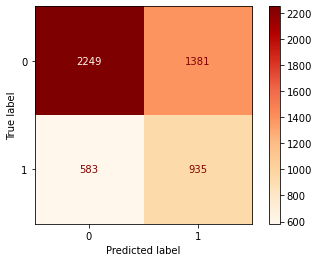

In [ ]:
y_pred = logreg.predict(X_test)  

print(f"logreg.coef_: {logreg.coef_}")
print(f"logreg.intercept_: {logreg.intercept_}")

acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score is {acc_score}')

pr = precision_score(y_test, y_pred)                        #how accurate the prediction was out of the predicted values
print(f'Precision is {pr}')

re = recall_score(y_test, y_pred)                           #how much did the prediction encapsulate 
print(f'Recall is {re}')

f1 = f1_score(y_test, y_pred)                               #more balanced accuracy score
print(f'F1 score is {f1}')

roc_auc = roc_auc_score(y_test, y_pred)                     #how good the model is 
print(f'ROC AUC is {roc_auc}')

cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")

Logistic regression can be a useful tool for handling high dimensional datasets with many features, but its performance can depend on a number of factors, such as the size of the dataset, the amount of noise in the data, and the degree of correlation between the features. In general, logistic regression works best when the features are highly informative and the data is not too noisy. When the number of features is very large, it can be difficult to determine which features are most important, and this can lead to overfitting or underfitting of the model. In such cases, other methods such as regularization, feature selection, or dimensionality reduction may be more appropriate. Ultimately, the best approach will depend on the specifics of the dataset and the goals of the analysis.

### Random Forest


In [ ]:
def balance_df(df, col_name, col_val, random_seed=400):        # random_seed initialises a pseudo-random number generator
    mask = df[col_name]==col_val
    df1 = df[mask]
    df2 = df[~mask]                                            # ~ is called 'tilde' and it's the complement operator 
    
    n_df1 = df1.shape[0]                                       # recall -- .shape returns the dimensions of a df as a tuple
    n_df2 = df2.shape[0]                                       # .shape[0] returns the number of rows in a dataframe
    
    if n_df1 > n_df2:
        df1 = df1.sample(n_df2, random_state=random_seed)      # df.sample() returns a random sample of items from an object
    else:
        df2 = df2.sample(n_df1, random_state=random_seed)

    out_df = pd.concat([df1, df2])                             # recall -- .concat() vertically stacks two dataframes together
    return out_df 

# balanced_news_df=balance_df(news_df_no_outliers,'hit',1)
# balanced_news_df['hit'].value_counts()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

news_train, news_test = train_test_split(news_df_no_outliers, test_size=0.3, random_state=0)          #splits data to 7:3 ratio
news_test, news_validation = train_test_split(news_test, test_size=0.5, random_state=0)     #splits the 3 of 7:3 into 1.5:1.5

# features=['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
#        'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
#        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
#        'num_keywords', 'data_channel_is_lifestyle',
#        'data_channel_is_entertainment', 'data_channel_is_bus',
#        'data_channel_is_socmed', 'data_channel_is_tech',
#        'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
#        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
#        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
#        'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
#        'global_sentiment_polarity', 'global_rate_positive_words',
#        'global_rate_negative_words', 'rate_positive_words',
#        'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
#        'max_positive_polarity', 'avg_negative_polarity',
#        'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
#        'title_sentiment_polarity', 'abs_title_subjectivity',
#        'abs_title_sentiment_polarity', 'polarity_high_pos_pol',
#        'polarity_low_neg_pol', 'polarity_low_pos_pol', 'polarity_med_neg_pol',
#        'polarity_med_pos_pol', 'is_weekday']

features=['n_tokens_title', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 
       'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'LDA_00',
       'LDA_02', 'LDA_03', 'global_subjectivity', 'avg_positive_polarity', 'avg_negative_polarity',
       'abs_global_pol_and_sub', 'title_pol_and_sub',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'polarity_high_pos_pol',
       'polarity_low_neg_pol', 'polarity_med_neg_pol',
       'polarity_med_pos_pol']

normalized_news_train = balance_df(normalized_news_train, 'hit',1)

X_train = news_train[features]
y_train = news_train['hit']


X_validation = news_validation[features]
y_validation = news_validation['hit']

X_test = news_test[features]
y_test = news_test['hit']

In [ ]:
rfc = RandomForestClassifier(n_estimators = 5000, max_depth = 80, random_state = 0, min_samples_split=.0001, min_samples_leaf=.0001, max_features='log2')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_validation)

In [ ]:
# from sklearn.model_selection import GridSearchCV   
# from sklearn.model_selection import RandomizedSearchCV          
 

# parameters = {'max_depth':        [2,3,4,5,6,7,8], 
#               'n_estimators':     [100,500,1000,250],
#               'max_features':     [6,7,8],
#               'min_samples_split':[2,5,20,50],                             # pass ranges for hyperparameters
#               'min_samples_leaf': [1, 10, 100, 0.01, 0.1, 0.5]}  

# rfc=RandomForestClassifier(random_state=0)       

# clf = GridSearchCV(estimator = rfc, param_grid = parameters, cv=5, n_jobs=-1)                       # pass model and paratements for search
# clf.fit(X_train, y_train)                                                                # fit selected model                  
# y_pred = clf.predict(X_test)                                                             # make predictions

# best_depth = clf.best_estimator_.max_depth                                               # access best_estimator parameters
# best_min_samples = clf.best_estimator_.min_samples_leaf           

# print(f'best estimator: depth {best_depth} and min_samples {best_min_samples}')

In [ ]:
# from sklearn.model_selection import GridSearchCV   
# from sklearn.model_selection import RandomizedSearchCV          
 

# parameters = {'max_depth':        [2,3,4,5,6,7,8], 
#               'n_estimators':     [100,500,1000,250],
#               'max_features':     [6,7,8],
#               'min_samples_split':[2,5,20,50],                             # pass ranges for hyperparameters
#               'min_samples_leaf': [1, 10, 100, 0.01, 0.1, 0.5],
#               'n_jobs':[-1]}  

# rfc=RandomForestClassifier(random_state=0)       

# clf = RandomizedSearchCV(estimator = rfc,param_distributions=parameters, cv=5, n_iter=100, n_jobs=-1, scoring='roc_auc')                       # pass model and paratements for search
# clf.fit(X_train, y_train)                                                                # fit selected model                  
# y_pred = clf.predict(X_test)                                                             # make predictions


In [ ]:
# best_depth = clf.best_estimator_.max_depth                                               # access best_estimator parameters
# best_estimators = clf.best_estimator_.n_estimators 
# best_max_features = clf.best_estimator_.max_features  
# best_min_samples_split = clf.best_estimator_.min_samples_split 
# best_min_samples_leaf = clf.best_estimator_.min_samples_leaf  
# print(f'best estimator: depth {best_depth}, estimators {best_estimators}, max_features {best_max_features}, min_samples_split {best_min_samples_split} min_samples_leaf {best_min_samples_leaf}')

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

parameters = {'max_depth':        Integer(1,80), 
              'criterion':        Categorical(['gini', 'entropy']),
              'n_estimators':     Integer(100,5000),
              'max_features':     Categorical(['sqrt','log2']),
              'min_samples_split':Real(0.0001,.5),                             # pass ranges for hyperparameters
              'min_samples_leaf': Real(0.0001,.5),
              'n_jobs': [-1]}  

rfc_optimizer = BayesSearchCV(
    estimator=RandomForestClassifier(),
    search_spaces=parameters,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    n_jobs=-1
)

# Step 5: Run the optimization
rfc_optimizer.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_model = rfc_optimizer

KeyboardInterrupt: 

In [ ]:
best_score = best_model.best_score_
best_params= best_model.best_estimator_
print(f'Best score is {best_score} with the parameters of {best_params}')

Best score is 0.6693983823179233 with the parameters of RandomForestClassifier(criterion='entropy', max_depth=80, max_features='log2',
                       min_samples_leaf=0.0001, min_samples_split=0.0001,
                       n_estimators=5000, n_jobs=-1)


In [ ]:
best_model.best_estimator_.min_samples_split

0.0001

In [ ]:
y_pred = best_model.predict(X_validation)

Accuracy score is 0.6158477374247426
Precision is 0.40472245236122617
Recall is 0.6436100131752306
F1 score is 0.49694811800610383
ROC AUC is 0.6239256345138063
[[2194 1437]
 [ 541  977]]


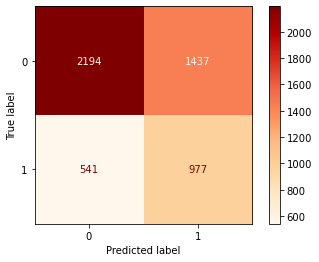

In [ ]:

acc_score = accuracy_score(y_validation, y_pred)
print(f'Accuracy score is {acc_score}')

pr = precision_score(y_validation, y_pred)                        #how accurate the prediction was out of the predicted values
print(f'Precision is {pr}')

re = recall_score(y_validation, y_pred)                           #how much did the prediction encapsulate 
print(f'Recall is {re}')

f1 = f1_score(y_validation, y_pred)                               #more balanced accuracy score
print(f'F1 score is {f1}')

roc_auc = roc_auc_score(y_validation, y_pred)                     #how good the model is 
print(f'ROC AUC is {roc_auc}')

cm = confusion_matrix(y_validation, y_pred)
print(cm)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")

Accuracy score is 0.627039627039627
Precision is 0.4158291457286432
Recall is 0.6541501976284585
F1 score is 0.5084485407066053
ROC AUC is 0.6349263384836508
[[2235 1395]
 [ 525  993]]


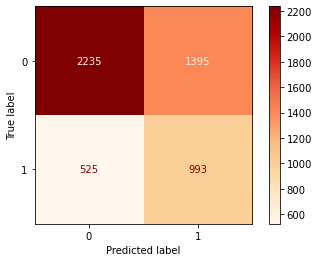

In [ ]:
y_pred = best_model.predict(X_test)  


acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score is {acc_score}')

pr = precision_score(y_test, y_pred)                        #how accurate the prediction was out of the predicted values
print(f'Precision is {pr}')

re = recall_score(y_test, y_pred)                           #how much did the prediction encapsulate 
print(f'Recall is {re}')

f1 = f1_score(y_test, y_pred)                               #more balanced accuracy score
print(f'F1 score is {f1}')

roc_auc = roc_auc_score(y_test, y_pred)                     #how good the model is 
print(f'ROC AUC is {roc_auc}')

cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")

Random Forest can still be a good model to use even if some of the features are not well correlated with the target variable. Random Forest can handle high-dimensional datasets with many features, and it can handle noisy and irrelevant features without overfitting. The fact that Random Forest creates a large number of trees and combines their predictions can help to improve the overall accuracy of the model, even if some of the trees are weak. However, it is always a good idea to try out different models and compare their performance to see which one works best for the specific dataset and problem at hand.

### XGBoost

In [ ]:
from xgboost import XGBClassifier

news_df_train, news_df_test = train_test_split(news_df_no_outliers, test_size=0.3, random_state=0)          #splits data to 7:3 ratio
news_df_test, news_df_validation = train_test_split(news_df_test, test_size=0.5, random_state=0)     #splits the 3 of 7:3 into 1.5:1.5

# features=['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
#        'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
#        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
#        'num_keywords', 'data_channel_is_lifestyle',
#        'data_channel_is_entertainment', 'data_channel_is_bus',
#        'data_channel_is_socmed', 'data_channel_is_tech',
#        'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
#        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
#        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
#        'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
#        'global_sentiment_polarity', 'global_rate_positive_words',
#        'global_rate_negative_words', 'rate_positive_words',
#        'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
#        'max_positive_polarity', 'avg_negative_polarity',
#        'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
#        'title_sentiment_polarity', 'abs_title_subjectivity',
#        'abs_title_sentiment_polarity', 'polarity_high_pos_pol',
#        'polarity_low_neg_pol', 'polarity_low_pos_pol', 'polarity_med_neg_pol',
#        'polarity_med_pos_pol', 'is_weekday']

features=['n_tokens_title', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 
       'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'LDA_00',
       'LDA_02', 'LDA_03', 'global_subjectivity', 'avg_positive_polarity', 'avg_negative_polarity',
       'abs_global_pol_and_sub', 'title_pol_and_sub',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'polarity_high_pos_pol',
       'polarity_low_neg_pol', 'polarity_med_neg_pol',
       'polarity_med_pos_pol']

X_train = news_df_train[features]
y_train = news_df_train['hit']


X_validation = news_df_validation[features]
y_validation = news_df_validation['hit']

X_test = news_df_test[features]
y_test = news_df_test['hit']


In [ ]:

# Initialize the XGBoost classifier
xgbclf = XGBClassifier( learning_rate=0.01,  # step size shrinkage used in update to prevent overfitting
    max_depth=8,  # maximum depth of a tree
    min_child_weight=.5,  # minimum sum of instance weight (hessian) needed in a child
    gamma=0,  # minimum loss reduction required to make a further partition on a leaf node of the tree
    subsample=0.8,  # subsample ratio of the training instances (randomly select a subset of data instances to grow trees)
    colsample_bytree=0.5,  # subsample ratio of columns when constructing each tree
    objective='binary:logistic',  # specify the learning task and the corresponding learning objective
    n_estimators=500,  # number of trees to fit
    seed=42 )

# Fit the classifier on the training data
xgbclf.fit(X_train, y_train)

# Use the classifier to predict on the test data
y_pred = xgbclf.predict(X_validation)


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

parameters = {'n_estimators':     Integer(100,2000),
              'max_depth':        Integer(1,50),
              'max_leaves':        Integer(0,40),
              'grow_policy':        Categorical(['depthwise','lossguide']),
              'learning_rate':    Real(0.0001,10), 
              'min_samples_leaf': Real(0.0001,.5),
              'min_child_weight': Real(1,100),
              'booster':     Categorical(['gbtree','dart'])}  

xgb_optimizer = BayesSearchCV(
    estimator=XGBClassifier(),
    search_spaces=parameters,
    n_iter=1,
    cv=5,
    scoring='roc_auc',
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    n_jobs=-1
)

# Step 5: Run the optimization
xgb_optimizer.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_model = xgb_optimizer

NameError: name 'XGBClassifier' is not defined

In [ ]:
best_score = best_model.best_score_
best_params= best_model.best_estimator_
print(f'Best score is {best_score} with the parameters of {best_params}')

Best score is 0.6560369214067547 with the parameters of XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.06845412760593916, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6833338901914231, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=13,
              min_child_weight=87.68049278307338, min_samples_leaf=0.5,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, predictor=None, ...)


Accuracy score is 0.6182176915488327
Precision is 0.6101800124146493
Recall is 0.6484168865435356
F1 score is 0.6287176207227374
ROC AUC is 0.6183068039275055
[[897 628]
 [533 983]]


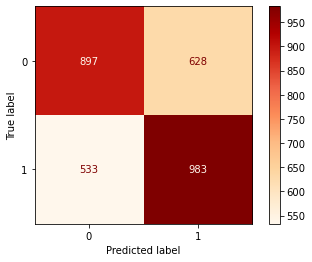

In [ ]:

# Evaluate the performance of the classifier on the test data
acc_score = accuracy_score(y_validation, y_pred)
print(f'Accuracy score is {acc_score}')

pr = precision_score(y_validation, y_pred)                        #how accurate the prediction was out of the predicted values
print(f'Precision is {pr}')

re = recall_score(y_validation, y_pred)                           #how much did the prediction encapsulate 
print(f'Recall is {re}')

f1 = f1_score(y_validation, y_pred)                               #more balanced accuracy score
print(f'F1 score is {f1}')

roc_auc = roc_auc_score(y_validation, y_pred)                     #how good the model is 
print(f'ROC AUC is {roc_auc}')

cm = confusion_matrix(y_validation, y_pred)
print(cm)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")

In [ ]:
# from sklearn.model_selection import GridSearchCV   
# from sklearn.model_selection import RandomizedSearchCV          
 


# parameters = {'max_depth':        [4,6,8,10],
#               'learning_rate':[0.01,.1,.5,.05],
#               'n_estimators':     [100,500,1000,250],
#               'min_child_weight':     [1,.5,2],
#               'subsample':[.8,.5,.7],                             # pass ranges for hyperparameters
#               'colsample_bytree': [.8,.5,.6],
#               'objective':['binary:logistic'],
#               'gamma':[0]}  

# xgbclf=XGBClassifier()       

# xgbclf = RandomizedSearchCV(estimator = xgbclf,param_distributions=parameters, cv=5, n_iter=100, n_jobs=-1, scoring='roc_auc')                       # pass model and paratements for search
# xgbclf.fit(X_train, y_train)                                                                # fit selected model                  
# y_pred = xgbclf.predict(X_test)                                                             # make predictions

In [ ]:
# xgbclf.best_estimator_.max_depth
# xgbclf.best_estimator_.learning_rate
# xgbclf.best_estimator_.n_estimators
# xgbclf.best_estimator_.min_child_weight
# xgbclf.best_estimator_.colsample_bytree


In [ ]:
y_pred = best_model.predict(X_test)

Accuracy score is 0.631578947368421
Precision is 0.6355987055016181
Recall is 0.6380766731643924
F1 score is 0.6368352788586252
ROC AUC is 0.6314966976748012
[[938 563]
 [557 982]]


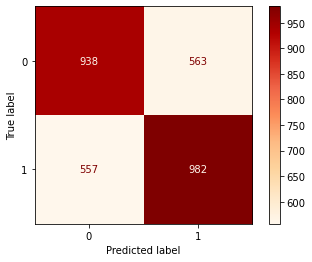

In [ ]:
# Evaluate the performance of the classifier on the test data
#y_pred = xgbclf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score is {acc_score}')

pr = precision_score(y_test, y_pred)                        #how accurate the prediction was out of the predicted values
print(f'Precision is {pr}')

re = recall_score(y_test, y_pred)                           #how much did the prediction encapsulate 
print(f'Recall is {re}')

f1 = f1_score(y_test, y_pred)                               #more balanced accuracy score
print(f'F1 score is {f1}')

roc_auc = roc_auc_score(y_test, y_pred)                     #how good the model is 
print(f'ROC AUC is {roc_auc}')

cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")

Random Forest and XGBoostClassifier are both powerful machine learning algorithms used for classification and regression tasks. Here are some differences between the two:

Training time: Random Forest typically trains faster than XGBoostClassifier, especially for large datasets. However, XGBoostClassifier can be parallelized to run on multiple CPUs and GPUs for faster training.

Performance: XGBoostClassifier often performs better than Random Forest on large, complex datasets with many features. It is particularly well-suited for high-dimensional datasets with sparse features.

Overfitting: Both algorithms are prone to overfitting, but XGBoostClassifier has regularization techniques built in to help prevent overfitting. Random Forest is less prone to overfitting than XGBoostClassifier, but it does not have the same level of built-in regularization.

Interpretabilty: Random Forest is generally considered to be more interpretable than XGBoostClassifier. Random Forest generates a set of decision trees that can be examined individually, while XGBoostClassifier creates a single complex model that can be difficult to interpret.

Overall, the choice between Random Forest and XGBoostClassifier depends on the specific characteristics of your dataset and your goals for the model. Both algorithms have their strengths and weaknesses, and the best choice may depend on the specific trade-offs that you are willing to make.

### LightGBM


In [ ]:
from lightgbm import LGBMClassifier


normalized_news_train, normalized_news_test = train_test_split(news_df_no_outliers, test_size=0.3, random_state=0)          #splits data to 7:3 ratio
normalized_news_test, normalized_news_validation = train_test_split(normalized_news_test, test_size=0.5, random_state=0)     #splits the 3 of 7:3 into 1.5:1.5

# features=['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
#        'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
#        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
#        'num_keywords', 'data_channel_is_lifestyle',
#        'data_channel_is_entertainment', 'data_channel_is_bus',
#        'data_channel_is_socmed', 'data_channel_is_tech',
#        'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
#        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
#        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
#        'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
#        'global_sentiment_polarity', 'global_rate_positive_words',
#        'global_rate_negative_words', 'rate_positive_words',
#        'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
#        'max_positive_polarity', 'avg_negative_polarity',
#        'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
#        'title_sentiment_polarity', 'abs_title_subjectivity',
#        'abs_title_sentiment_polarity', 'polarity_high_pos_pol',
#        'polarity_low_neg_pol', 'polarity_low_pos_pol', 'polarity_med_neg_pol',
#        'polarity_med_pos_pol', 'is_weekday']

features=['n_tokens_title', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 
       'data_channel_is_socmed', 'data_channel_is_tech', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'LDA_00',
       'LDA_02', 'LDA_03', 'global_subjectivity', 'avg_positive_polarity', 'avg_negative_polarity',
       'abs_global_pol_and_sub', 'title_pol_and_sub',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'polarity_high_pos_pol',
       'polarity_low_neg_pol', 'polarity_med_neg_pol',
       'polarity_med_pos_pol']

normalized_news_train = balance_df(normalized_news_train, 'hit',1)

X_train = normalized_news_train[features]
y_train = normalized_news_train['hit']

X_validation = normalized_news_validation[features]
y_validation = normalized_news_validation['hit']

X_test = normalized_news_test[features]
y_test = normalized_news_test['hit']

In [ ]:
# Initialize the XGBoost classifier
lgbmclf = LGBMClassifier( learning_rate=0.01,  # step size shrinkage used in update to prevent overfitting
    max_depth=8,  # maximum depth of a tree
    min_child_weight=.5,  # minimum sum of instance weight (hessian) needed in a child
    subsample=0.8,  # subsample ratio of the training instances (randomly select a subset of data instances to grow trees)
    colsample_bytree=0.5,  # subsample ratio of columns when constructing each tree
    objective='binary',  # specify the learning task and the corresponding learning objective
    n_estimators=500,  # number of trees to fit
    seed=42,
    n_jobs=-1 )

# Fit the classifier on the training data
lgbmclf.fit(X_train, y_train)

# Use the classifier to predict on the test data
y_pred = lgbmclf.predict(X_validation)

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

parameters = {'boosting_type': Categorical(['gbdt','dart','rf']),
              'max_depth':        Integer(-1,100),
              'learning_rate':    Real(0.0001,10),
              'n_estimators':     Integer(100,3000),
              'num_leaves':        Integer(2,150),
              'objective':          ['binary'],
              'min_split_gain': Real(0,.5),
              'min_child_weight': Real(.001,100),
              'min_child_samples': Integer(1,200),
              'colsample_bytree': Real(.05,1),
              'subsample': Real(.5,1),
              'reg_alpha': Real(.01,1),
              'reg_lambda': Real(.001,.1),
              'bagging_fraction': Real(0.1, .999),
              'bagging_freq': Integer(1, 10),
              'random_state':[42]}  

lgbm=LGBMClassifier()

lgbm_optimizer = BayesSearchCV(
    estimator=lgbm,
    search_spaces=parameters,
    n_iter=100,
    cv=5,
    scoring='roc_auc',
    optimizer_kwargs={'base_estimator': 'GP'},
    random_state=42,
    n_jobs=-1
)

# Step 5: Run the optimization
lgbm_optimizer.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_model = lgbm_optimizer

[LightGBM] [Warning] bagging_fraction is set=0.8233275844077227, subsample=0.6178868164502239 will be ignored. Current value: bagging_fraction=0.8233275844077227
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


In [ ]:
best_score = best_model.best_score_
best_params= best_model.best_estimator_
print(f'Best score is {best_score} with the parameters of {best_params}')

Best score is 0.6671826097180009 with the parameters of LGBMClassifier(bagging_fraction=0.8233275844077227, bagging_freq=10,
               boosting_type='rf', colsample_bytree=0.6410282899695388,
               learning_rate=0.0001, max_depth=100, min_child_samples=1,
               n_estimators=3000, num_leaves=150, objective='binary',
               random_state=42, reg_alpha=1.0, reg_lambda=0.001,
               subsample=0.6178868164502239)


In [ ]:
lgbm=LGBMClassifier()

Accuracy score is 0.6158477374247426
Precision is 0.40472245236122617
Recall is 0.6436100131752306
F1 score is 0.49694811800610383
ROC AUC is 0.6239256345138063
[[2194 1437]
 [ 541  977]]


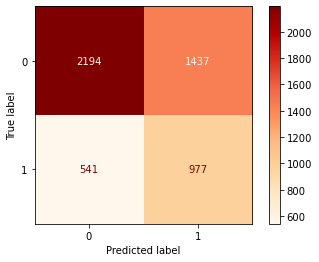

In [ ]:
y_pred = best_model.predict(X_validation)
# Evaluate the performance of the classifier on the test data
acc_score = accuracy_score(y_validation, y_pred)
print(f'Accuracy score is {acc_score}')

pr = precision_score(y_validation, y_pred)                        #how accurate the prediction was out of the predicted values
print(f'Precision is {pr}')

re = recall_score(y_validation, y_pred)                           #how much did the prediction encapsulate 
print(f'Recall is {re}')

f1 = f1_score(y_validation, y_pred)                               #more balanced accuracy score
print(f'F1 score is {f1}')

roc_auc = roc_auc_score(y_validation, y_pred)                     #how good the model is 
print(f'ROC AUC is {roc_auc}')

cm = confusion_matrix(y_validation, y_pred)
print(cm)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")

Accuracy score is 0.627039627039627
Precision is 0.4158291457286432
Recall is 0.6541501976284585
F1 score is 0.5084485407066053
ROC AUC is 0.6349263384836508
[[2235 1395]
 [ 525  993]]


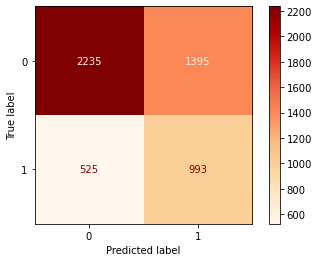

In [ ]:
y_pred = best_model.predict(X_test)
# Evaluate the performance of the classifier on the test data
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score is {acc_score}')

pr = precision_score(y_test, y_pred)                        #how accurate the prediction was out of the predicted values
print(f'Precision is {pr}')

re = recall_score(y_test, y_pred)                           #how much did the prediction encapsulate 
print(f'Recall is {re}')

f1 = f1_score(y_test, y_pred)                               #more balanced accuracy score
print(f'F1 score is {f1}')

roc_auc = roc_auc_score(y_test, y_pred)                     #how good the model is 
print(f'ROC AUC is {roc_auc}')

cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")

In [ ]:
lgbm_optimizer.best_estimator_

LGBMClassifier(bagging_fraction=0.8233275844077227, bagging_freq=10,
               boosting_type='rf', colsample_bytree=0.6410282899695388,
               learning_rate=0.0001, max_depth=100, min_child_samples=1,
               n_estimators=3000, num_leaves=150, objective='binary',
               random_state=42, reg_alpha=1.0, reg_lambda=0.001,
               subsample=0.6178868164502239)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

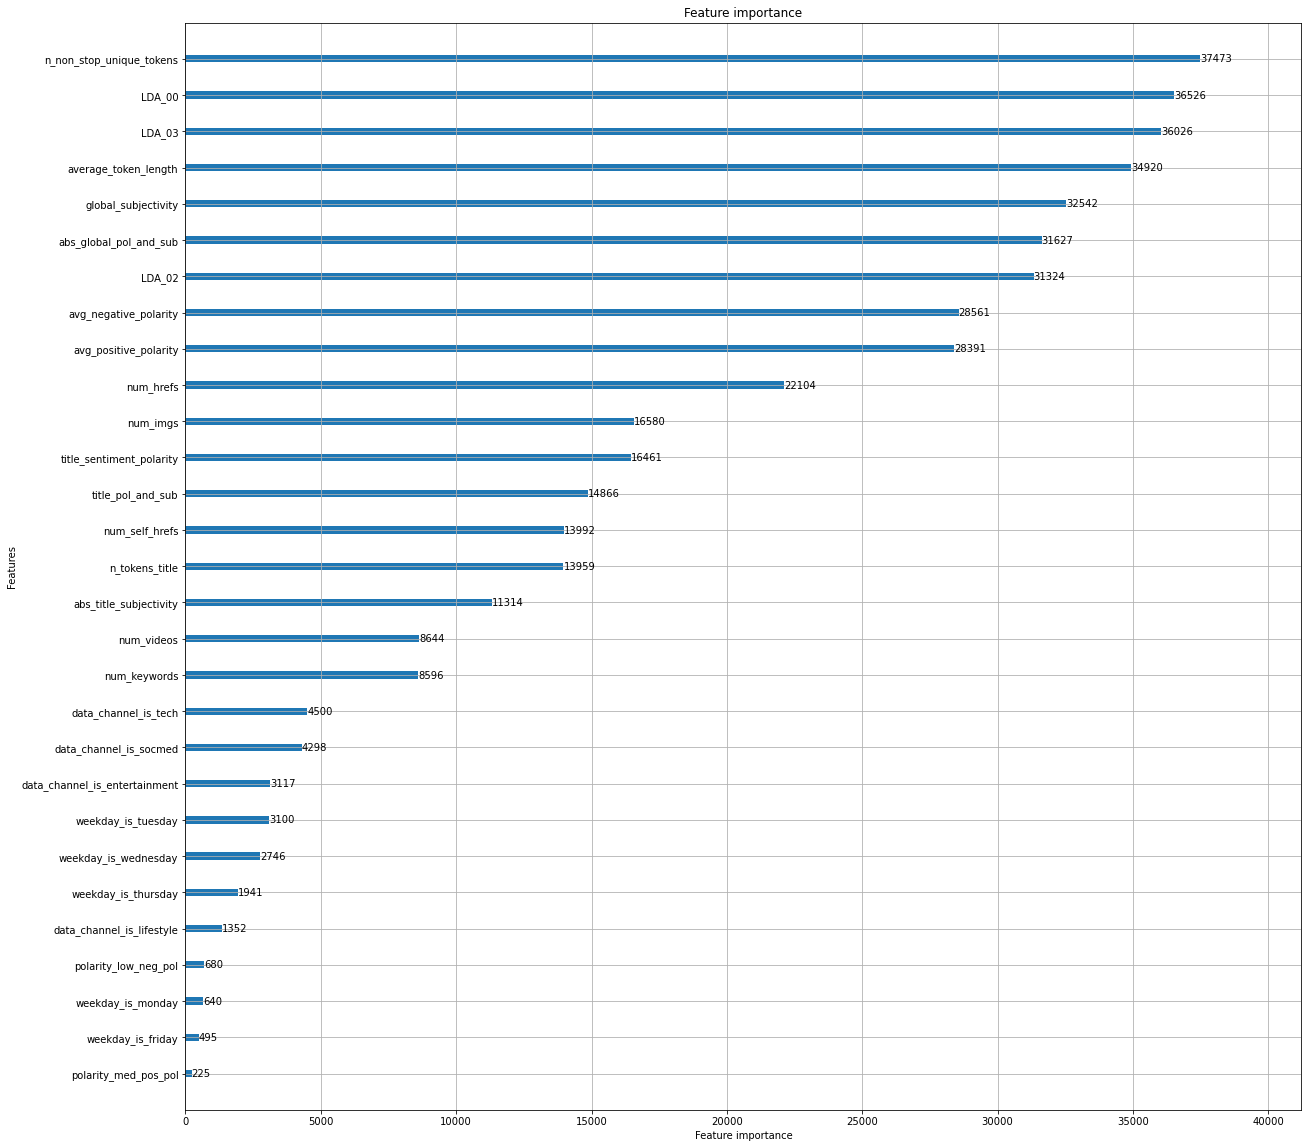

In [ ]:
from lightgbm import plot_importance


yes=LGBMClassifier(bagging_fraction=0.8233275844077227, bagging_freq=10,
               boosting_type='rf', colsample_bytree=0.6410282899695388,
               learning_rate=0.0001, max_depth=100, min_child_samples=1,
               n_estimators=3000, num_leaves=150, objective='binary',
               random_state=42, reg_alpha=1.0, reg_lambda=0.001,
               subsample=0.6178868164502239)
yes.fit(X_train, y_train)
plot_importance(yes, figsize=(20,20))

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


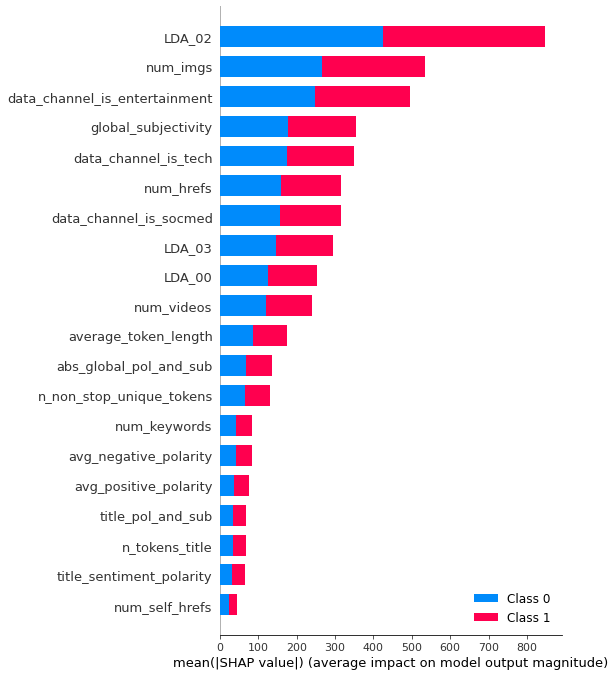

In [ ]:
import shap

explainer = shap.Explainer(yes)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

ValueError: Found input variables with inconsistent numbers of samples: [5148, 5149]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X_test.iloc[:1000,:])

### Neural Networks

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_norm)

print(pca.explained_variance_ratio_.sum())    # total variance
print(pca.explained_variance_ratio_)          # variance contained per component)


0.29685351381982805
[0.10334638 0.09762849 0.09587864]


### Questions: 
- I've read that if PCA doesn't capture 80-90% of the variance in 3 component or else, it isn't worth to use PCA and we should use other dimensionality reduction methods. 
- Is there a common practice for knowing how many layers/nodes to use in the hidden layers for a neural network?
- When do you balance unbalanced datasets vs when you include unbalanced datasets and use model parameters to add weights
- At what point should you include multicollinear variables? I've read articles saying it isn't always necessary to remove multicollinear varaibles because their impact can be reduced by regularization. Is the only reason why we remove multicollinear features because it makes it harder to intepret the impact a feature gives. 
- Around what model performance metric does a model typically able to make it into production?